In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt' , 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt' , 'rb') as f:
    test_data = pickle.load(f)

In [4]:
print(type(train_data) , len(train_data) , type(test_data) , len(test_data))

<class 'list'> 10000 <class 'list'> 1000


In [5]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [6]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [7]:
train_data[0][2]

'no'

In [8]:
all_data = train_data + test_data

In [9]:
vocab = set()

for story , question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
    

In [10]:
vocab.add('no')
vocab.add('yes')

In [11]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [12]:
vocab_len = len(vocab) + 1

In [13]:
#Longest story
all_story_len = [len(data[0]) for data in all_data]
all_story_len

[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 38,
 50,
 63,
 13,
 25,
 37,
 49,
 61,
 24,
 37,
 48,
 71,
 83,
 13,
 25,
 37,
 50,
 62,
 12,
 24,
 35,
 46,
 71,
 12,
 24,
 37,
 50,
 62,
 13,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 39,
 50,
 62,
 13,
 26,
 38,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 62,
 13,
 25,
 38,
 52,
 65,
 12,
 24,
 37,
 48,
 61,
 13,
 25,
 38,
 51,
 64,
 12,
 25,
 39,
 53,
 65,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 25,
 37,
 49,
 60,
 72,
 13,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 12,
 23,
 36,
 47,
 59,
 12,
 24,
 35,
 48,
 61,
 12,
 23,
 36,
 49,
 62,
 12,
 25,
 37,
 48,
 59,
 12,
 25,
 37,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 61,
 12,
 24,
 35,
 48,
 61,
 12,
 25,
 37,
 49,
 62,
 12,
 24,
 38,
 50,
 62,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 60,


In [14]:
max_story_len = max(all_story_len)

In [15]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [16]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [19]:
train_story_text = []
train_question_text = []
train_answers = []


In [20]:
for story , question , answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [21]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [22]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
train_story_seq
#this was the manual way of doing it

[[26, 19, 31, 23, 29, 3, 8, 22, 31, 23, 33, 3],
 [26,
  19,
  31,
  23,
  29,
  3,
  8,
  22,
  31,
  23,
  33,
  3,
  26,
  27,
  15,
  31,
  23,
  33,
  3,
  28,
  27,
  15,
  31,
  23,
  36,
  3],
 [26,
  19,
  31,
  23,
  29,
  3,
  8,
  22,
  31,
  23,
  33,
  3,
  26,
  27,
  15,
  31,
  23,
  33,
  3,
  28,
  27,
  15,
  31,
  23,
  36,
  3,
  8,
  27,
  31,
  23,
  14,
  3,
  28,
  27,
  15,
  31,
  23,
  29,
  3],
 [26,
  19,
  31,
  23,
  29,
  3,
  8,
  22,
  31,
  23,
  33,
  3,
  26,
  27,
  15,
  31,
  23,
  33,
  3,
  28,
  27,
  15,
  31,
  23,
  36,
  3,
  8,
  27,
  31,
  23,
  14,
  3,
  28,
  27,
  15,
  31,
  23,
  29,
  3,
  28,
  16,
  4,
  23,
  1,
  12,
  3,
  28,
  27,
  31,
  23,
  33,
  3],
 [26,
  19,
  31,
  23,
  29,
  3,
  8,
  22,
  31,
  23,
  33,
  3,
  26,
  27,
  15,
  31,
  23,
  33,
  3,
  28,
  27,
  15,
  31,
  23,
  36,
  3,
  8,
  27,
  31,
  23,
  14,
  3,
  28,
  27,
  15,
  31,
  23,
  29,
  3,
  28,
  16,
  4,
  23,
  1,
  12,
  3,
  28,
 

In [24]:
#creating a function for vectorizing

def vectorize_stories(data , word_index = tokenizer.word_index , max_story_len = max_story_len , max_question_len = max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story , question , answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X , maxlen=max_story_len) , pad_sequences(Xq , maxlen=max_question_len) , np.array(Y))


In [25]:
inputs_train , queries_train , answers_train = vectorize_stories(train_data)

In [26]:
inputs_test , queries_test , answers_test = vectorize_stories(test_data)

In [27]:
inputs_test

array([[ 0,  0,  0, ..., 23, 33,  3],
       [ 0,  0,  0, ..., 23, 18,  3],
       [ 0,  0,  0, ..., 23, 18,  3],
       ...,
       [ 0,  0,  0, ..., 23,  5,  3],
       [ 0,  0,  0, ..., 23, 18,  3],
       [ 0,  0,  0, ...,  5, 12,  3]])

In [28]:
queries_test

array([[13,  2, 25, 23, 14, 37],
       [13,  2, 25, 23, 14, 37],
       [13,  2, 25, 23, 18, 37],
       ...,
       [13, 26, 25, 23, 33, 37],
       [13,  8, 25, 23, 18, 37],
       [13, 26, 25, 23, 18, 37]])

In [29]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from keras.models import Sequential , Model
from keras.layers.embeddings import Embedding
from keras.layers import Input , Activation , Dense , Permute , Dropout , add , dot , concatenate , LSTM

In [31]:
#PLACEHOLDER shape = (max_story_len , batch_size)
input_sequence = Input((max_story_len , ))
question = Input((max_question_len , ))

In [32]:
#vocab_len
vocab_size = len(vocab) + 1

In [33]:
#INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size , output_dim=64))
input_encoder_m.add(Dropout(0.3))

#(samples , story_max_len , embedding_dim)


Instructions for updating:
Colocations handled automatically by placer.


In [34]:
#INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size , output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#(samples , story_max_len , max_question_len)

In [35]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size , output_dim=64 , input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples , query_max_len , embedding_dim)

In [36]:
#ENCODED <---- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [37]:
match = dot([input_encoded_m , question_encoded] , axes=(2,2))
match = Activation('softmax')(match)

In [38]:
response = add([match , input_encoded_c])
response = Permute((2,1))(response)

In [39]:
answer = concatenate([response , question_encoded])
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [40]:
answer = LSTM(32)(answer)

In [41]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [42]:
answer = Activation('softmax')(answer)

In [43]:
model = Model([input_sequence , question] , answer)

In [44]:
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [51]:
history = model.fit([inputs_train , queries_train] , answers_train , batch_size=32 , epochs=100 , validation_data=([inputs_test , queries_test] , answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 272us/step - loss: 0.6563 - accuracy: 0.6003 - val_loss: 0.6412 - val_accuracy: 0.6390
Epoch 2/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.6282 - accuracy: 0.6394 - val_loss: 0.6009 - val_accuracy: 0.6770
Epoch 3/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.6044 - accuracy: 0.6684 - val_loss: 0.5744 - val_accuracy: 0.7020
Epoch 4/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.5771 - accuracy: 0.7004 - val_loss: 0.5405 - val_accuracy: 0.7210
Epoch 5/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.5397 - accuracy: 0.7415 - val_loss: 0.4862 - val_accuracy: 0.7820
Epoch 6/100
10000/10000 [==============================] - 4s 360us/step - loss: 0.5031 - accuracy: 0.7627 - val_loss: 0.4615 - val_accuracy: 0.7790
Epoch 7/100
10000/10000 [==============================] 

10000/10000 [==============================] - 3s 348us/step - loss: 0.2624 - accuracy: 0.8866 - val_loss: 0.3886 - val_accuracy: 0.8310
Epoch 56/100
10000/10000 [==============================] - 3s 347us/step - loss: 0.2612 - accuracy: 0.8871 - val_loss: 0.4216 - val_accuracy: 0.8270
Epoch 57/100
10000/10000 [==============================] - 3s 347us/step - loss: 0.2579 - accuracy: 0.8893 - val_loss: 0.3793 - val_accuracy: 0.8310
Epoch 58/100
10000/10000 [==============================] - 3s 349us/step - loss: 0.2611 - accuracy: 0.8862 - val_loss: 0.3734 - val_accuracy: 0.8340
Epoch 59/100
10000/10000 [==============================] - 3s 347us/step - loss: 0.2572 - accuracy: 0.8893 - val_loss: 0.4152 - val_accuracy: 0.8210
Epoch 60/100
10000/10000 [==============================] - 3s 348us/step - loss: 0.2577 - accuracy: 0.8876 - val_loss: 0.3836 - val_accuracy: 0.8290
Epoch 61/100
10000/10000 [==============================] - 4s 376us/step - loss: 0.2520 - accuracy: 0.8946 - val

In [52]:
filename = 'chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


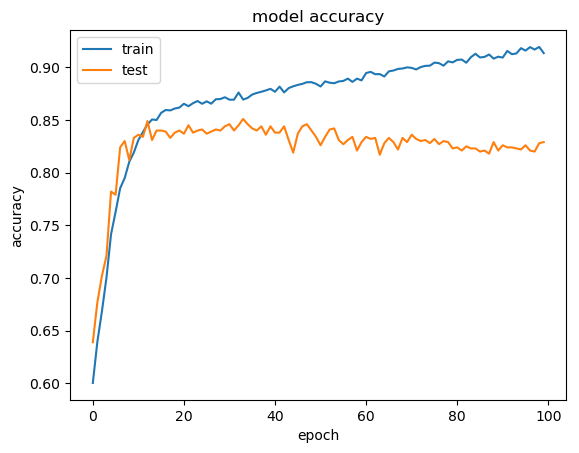

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
#filename = 'chatbot_100_epochs.h5'
model.load_weights(filename)
pred_results = model.predict(([inputs_test , queries_test]))

In [57]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [58]:
pred_results.shape

(1000, 38)

In [59]:
val_max = np.argmax(pred_results[0])

In [60]:
for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [61]:
k

'no'

In [62]:
pred_results[0][val_max]

0.9999968

# 

In [63]:
#writing my own story (use words provided in the vocabulary only , and add space before and after the punctuation)
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [64]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [65]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [66]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [67]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        34, 23, 14,  3,  8,  6, 23,  1, 25, 23, 18,  3]])

In [68]:
pred_results = model.predict(([ my_story, my_ques]))

In [69]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9190013
